Env: ocean + dwave <br>
Auth: sorin_moldoveanu <br>
Referfences: https://docs.dwavesys.com/docs/latest<br>
             http://docs.ocean.dwavesys.com/en/latest/overview/solving_problems.html<br>
           

__Structural imbalance__

 problem: SNA kind problem<br>
 

Friendly relationships:  [('Alice', 'Bob'), ('Bob', 'Eve'), ('Eve', 'Wally')]
Hostile relationships:  [('Alice', 'Eve'), ('Alice', 'Wally'), ('Bob', 'Wally')]
Yellow set:  ['Alice', 'Bob']
Blue set:  ['Eve', 'Wally']

Frustrated relationships:  [('Bob', 'Eve')]


/root/anaconda3/envs/ocean/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


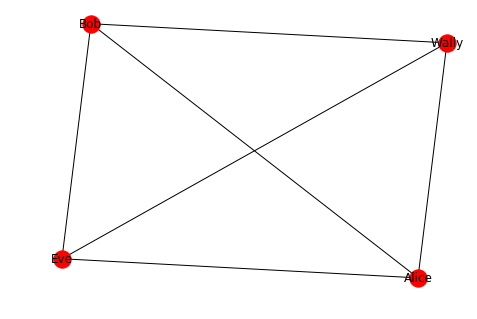

In [2]:
#imports

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import numpy as np
import dimod
import dwave_networkx as dnx
# Use NetworkX graphic package and Python's random library to create a randomly signed network
import networkx as nx
import random
from networkx import draw

# Create a K4 complete graph (default node labels are indexical from 0)
G = nx.complete_graph(4)
# Randomly assign +1 or -1 relationship signs to all edges. Rename node 0 to Alice, 1 to Bob, etc
G.add_edges_from([(u, v, {'sign': 2*random.randint(0, 1)-1}) for u, v in G.edges])
nx.relabel_nodes(G, {0: 'Alice', 1: 'Bob', 2: 'Eve', 3: 'Wally'}, copy=False)

# Print the relationships assigned by the current code execution
print('Friendly relationships: ', [(x, y) for (x, y, sign) in G.edges(data='sign') if (sign == 1)])
print('Hostile relationships: ', [(x, y) for (x, y, sign) in G.edges(data='sign') if (sign == -1)])

sampler = EmbeddingComposite(DWaveSampler())

# Return a good partition (minimal structural imbalance) and its frustrated edges 
imbalance, bicoloring = dnx.structural_imbalance(G, sampler)

# Mark the returned frustrated edges and node set (color) on the graph 
for edge in G.edges:
    G.edges[edge]['frustrated'] = edge in imbalance
for node in G.nodes:
    G.nodes[node]['color'] = bicoloring[node]

# Print the relationships for the returned partition
print('Yellow set: ', [person for (person, color) in bicoloring.items() if (color == 0)])
print('Blue set: ', [person for (person, color) in bicoloring.items() if (color == 1)])
print('\nFrustrated relationships: ', list(imbalance.keys()))

draw(G, with_labels=True)


In [14]:
from bokeh.io import show, output_file, output_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Structural Imbalance with Bokeh Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="red", line_alpha=0.8, line_width=1)
graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_notebook()
#output_file("interactive_graphs.html")
show(plot)

Loading BokehJS ...

/root/anaconda3/envs/ocean/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


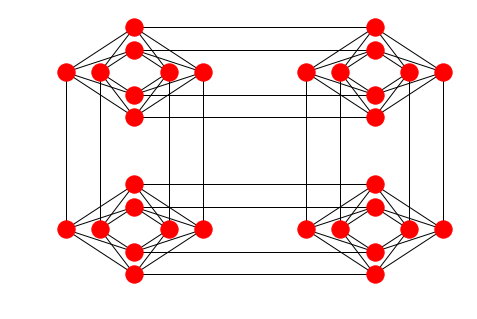

In [13]:
 import matplotlib.pyplot as plt
H = dnx.chimera_graph(2, 2, 4)
dnx.draw_chimera(H)
plt.show()  # doctest: +SKIP